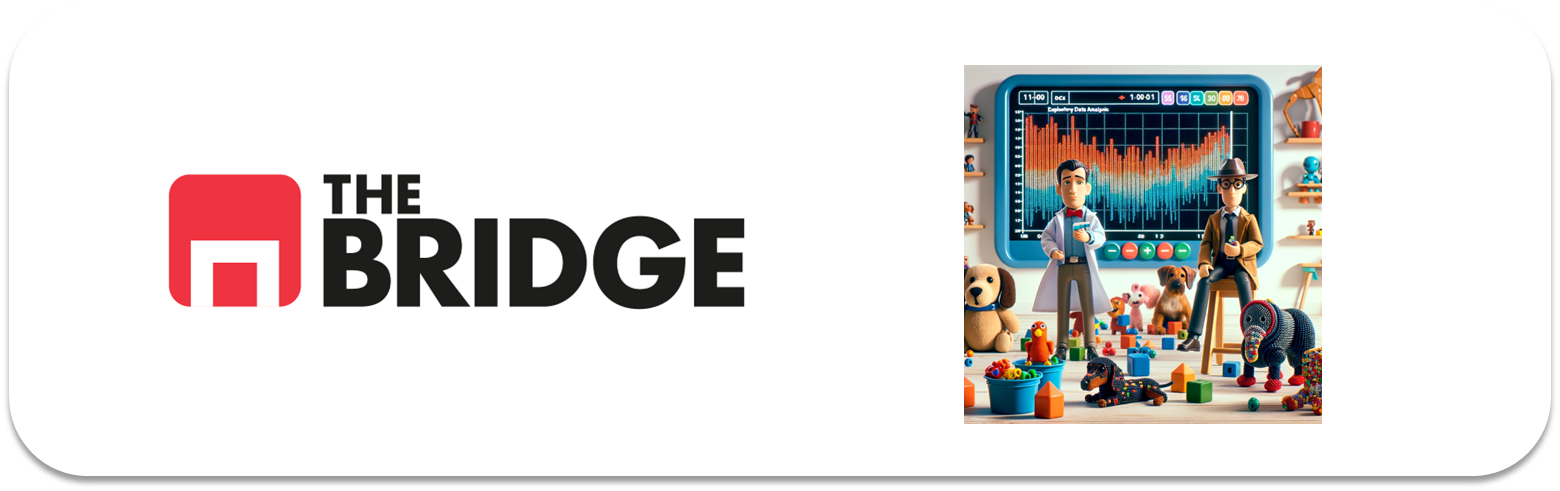

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship
from scipy.stats import pearsonr

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [5]:
df = pd.read_csv("./data/titanic.csv")
df_back=df.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [6]:
df.drop(["deck","survived","pclass","embarked"], axis=1, inplace=True)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [8]:
df["family_members"]= df["parch"]+df["sibsp"]
df.drop(["parch","sibsp"], axis =1, inplace = True)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
moda_embark = df["embark_town"].mode().iloc[0]
df["embark_town"].fillna(moda_embark, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [12]:
media_edad = df["age"].mean()
df["age"].fillna(media_edad, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

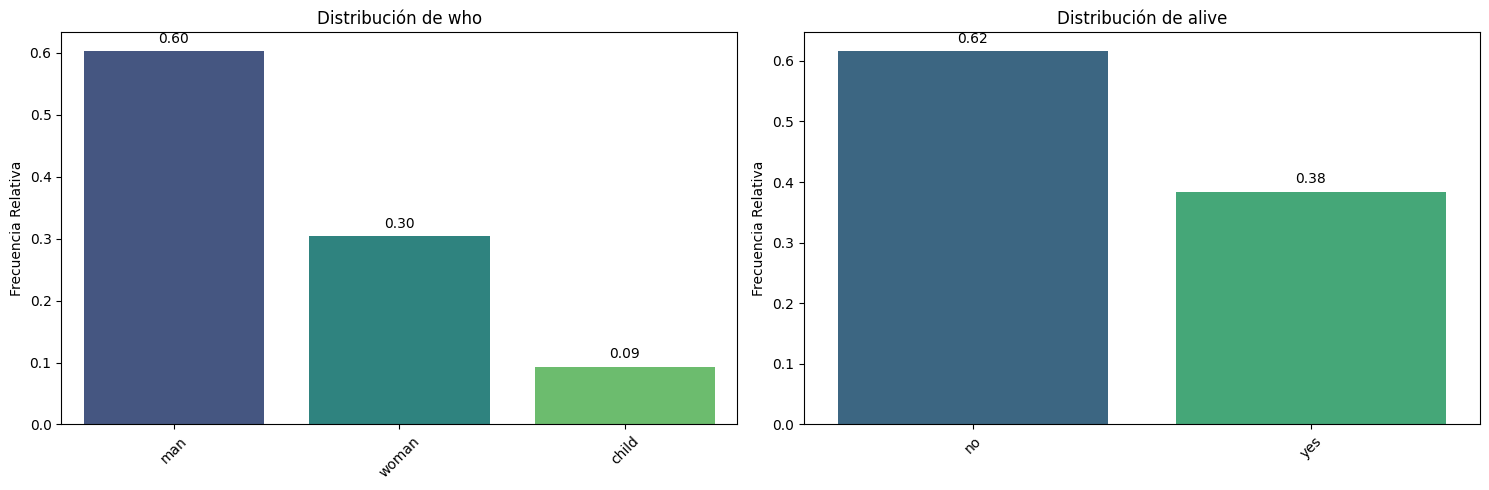

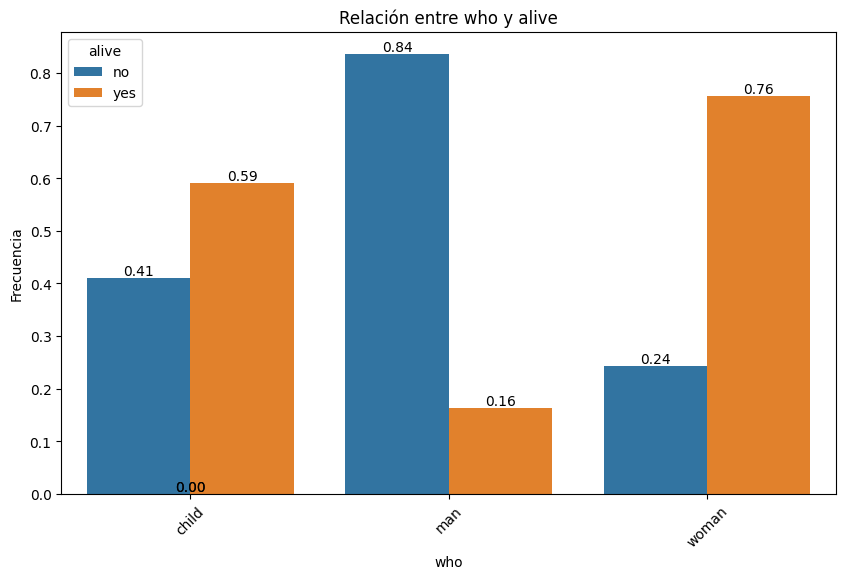

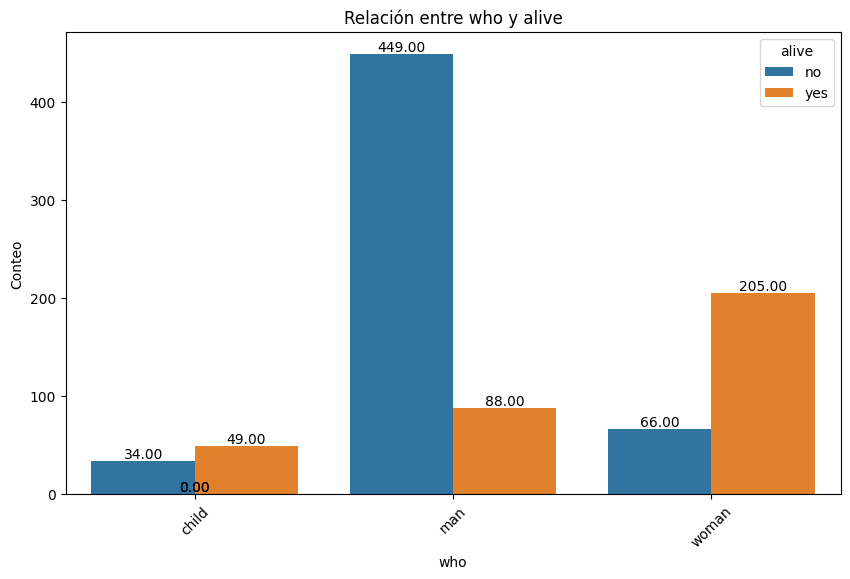

In [17]:
#1
pinta_distribucion_categoricas(df,["who","alive"], relativa= True, mostrar_valores= True)
plot_categorical_relationship_fin(df, "who","alive", relative_freq= True,  show_values= True)
plot_categorical_relationship_fin(df, "who","alive", show_values= True)

In [ ]:
#1 En terminos absolutos sobrevivieron mas mujeres. En terminos relativos tambien sobrevivieron mas mujeres.
#Existe una relacion directa entre ser mujer y haber sobrevivido al accidente ya que el 76% de las mujeres sobrevivieron vs el 16% de los hombres
#En total hay 808 adultos entre hombres y mujeres, de los cuales sobreviven 293 y representa el 36,26%. En vista al 59% de supervivencia de los niños
#se le dio preferencia a los menores de edad sobre los adultos.

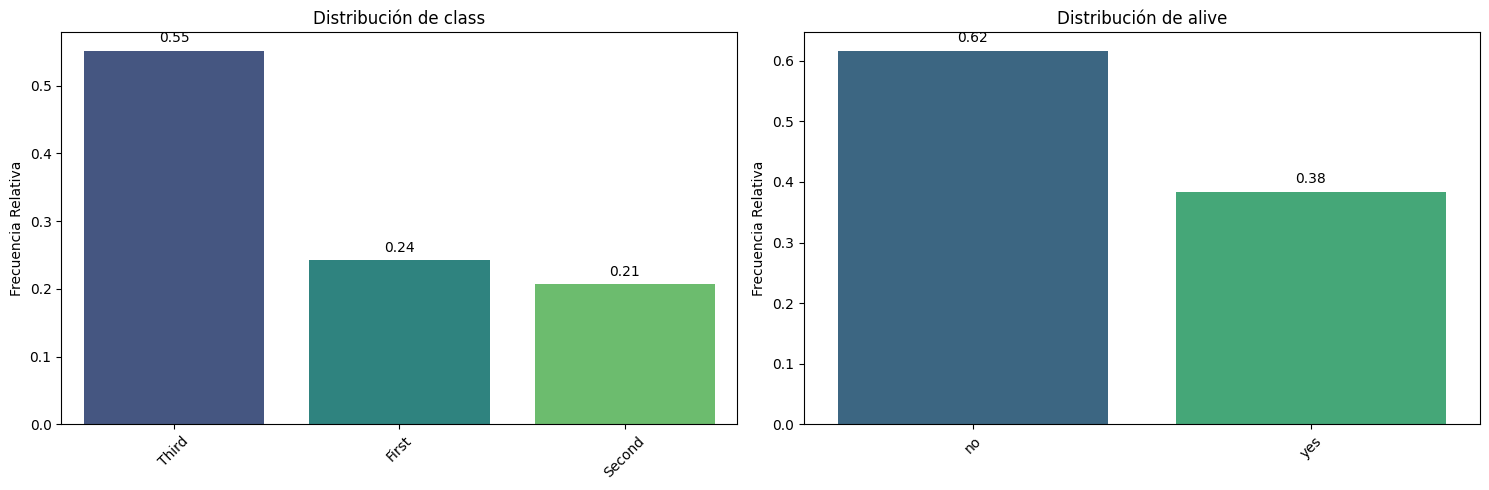

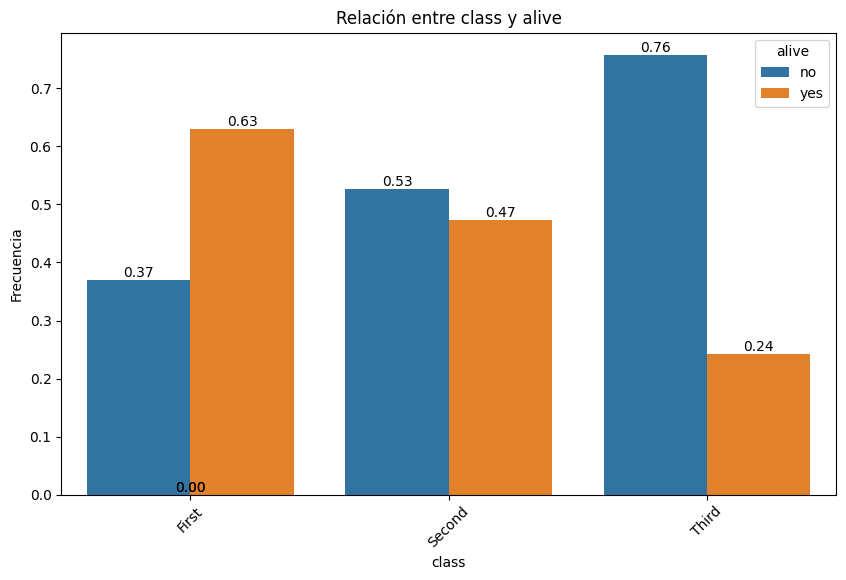

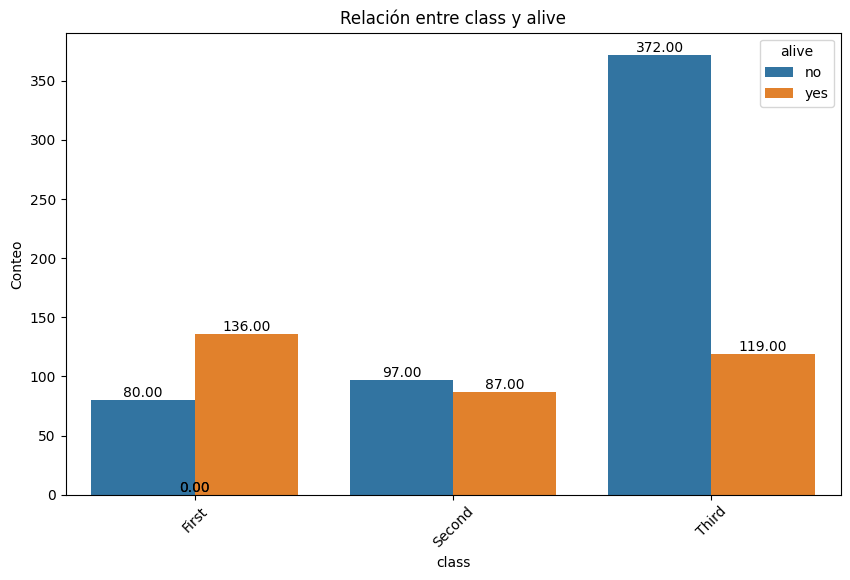

In [19]:
#2
pinta_distribucion_categoricas(df,["class","alive"], relativa= True, mostrar_valores= True)
plot_categorical_relationship_fin(df, "class","alive", relative_freq= True,  show_values= True)
plot_categorical_relationship_fin(df, "class","alive", show_values= True)

In [ ]:
#2 en terminos absolutos sobreviven mas pasajeros de primera clase (136)
#en terminos relativos tambien sobreviven mas pasajeros de primera clase sobre cualquier otra (63%)
#hay una relacion directa entre la clase y la supervivencia. A mayor clase hubo mas porcentaje de supervivencia.

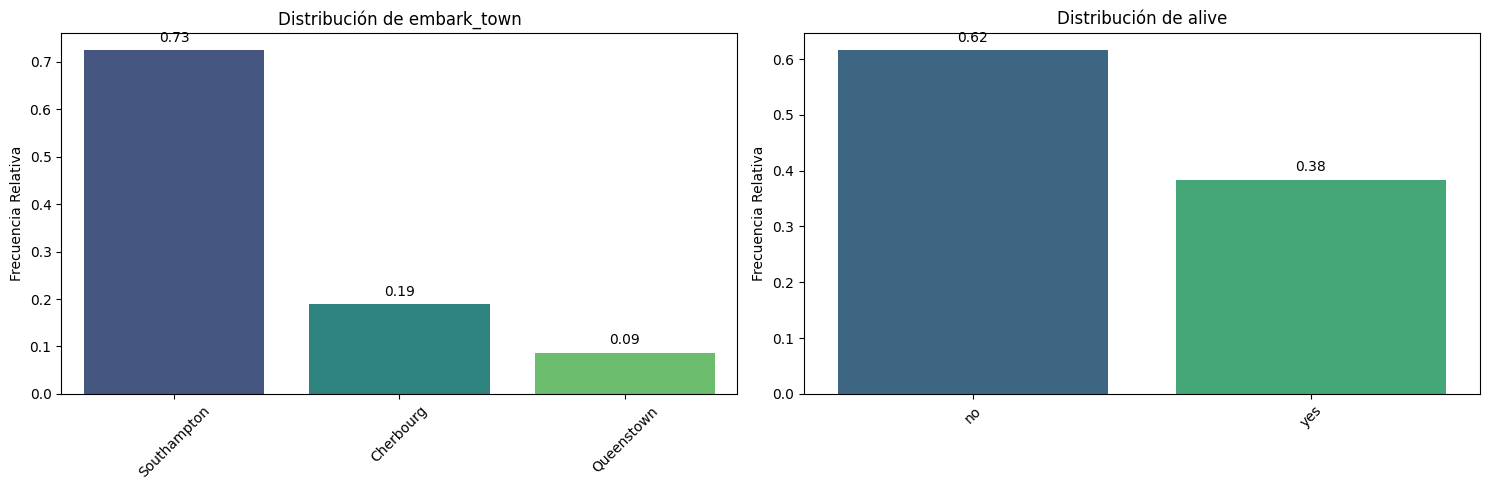

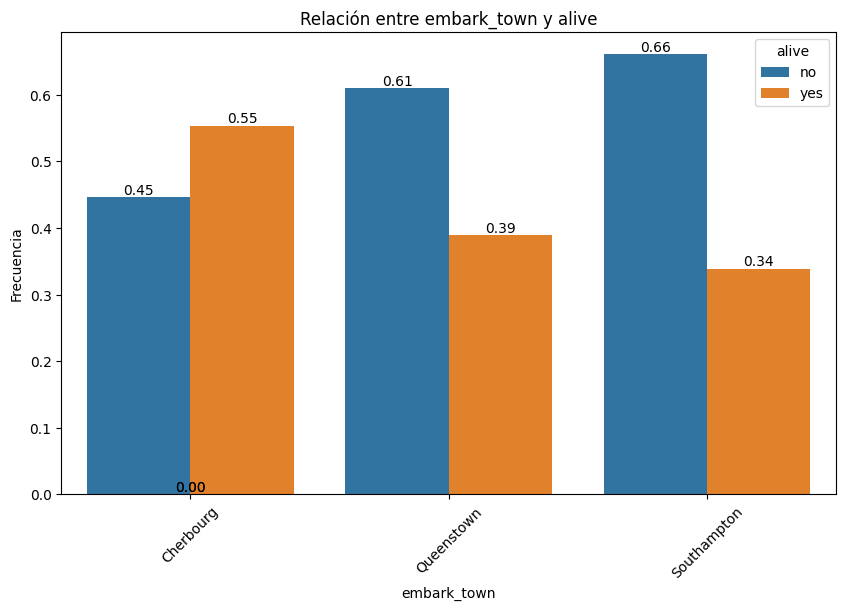

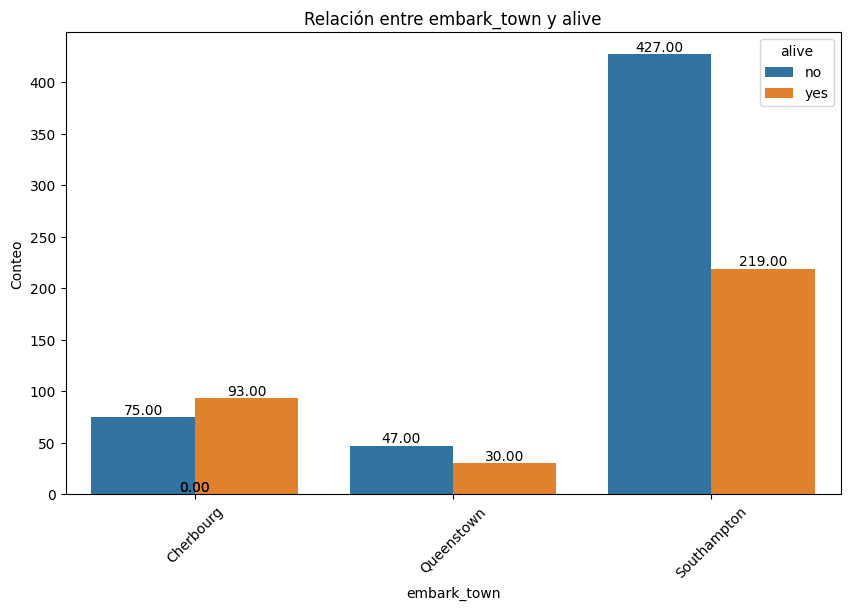

In [20]:
#3
pinta_distribucion_categoricas(df,["embark_town","alive"], relativa= True, mostrar_valores= True)
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq= True,  show_values= True)
plot_categorical_relationship_fin(df, "embark_town","alive", show_values= True)

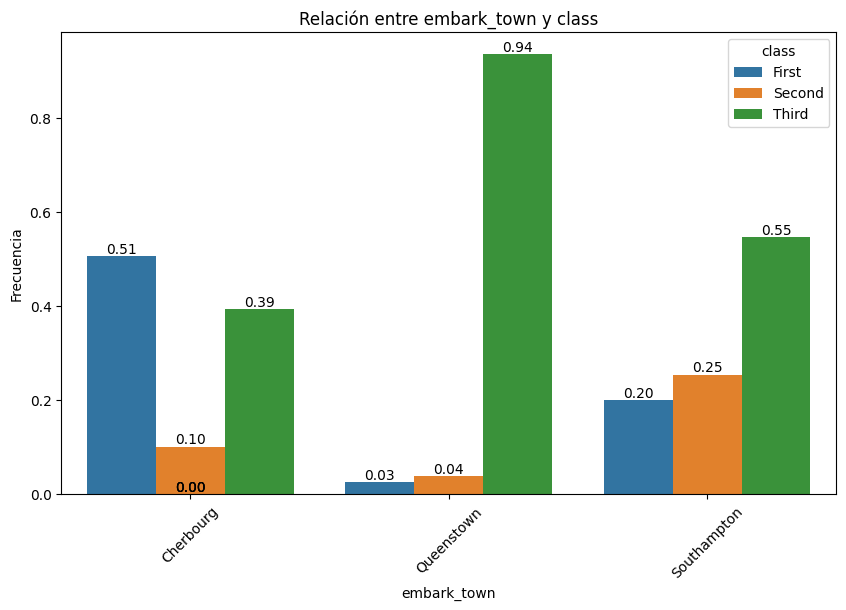

In [21]:
#3 Sobreviven mas personas de Southampton, pero no nos dice mucho ya que la gran mayoria eran de southampton
#porcentualmente sobreviven mas de Cherbourg 55% vs 39% the Q y 34% de S que ambas tienen estadisticas similares. 
#parece haber sido favorable el haber embarcado en Francia, sin embargo, podria ser mera casualidad. si vemos el grafico de abajo vemos la gran mayoria
#de los pasajeros que abordan en Francia eran de primera clase. Previamente se habia comprobado que la clase impacto directamente sobre la supervivencia.
plot_categorical_relationship_fin(df, "embark_town","class", relative_freq= True,  show_values= True)

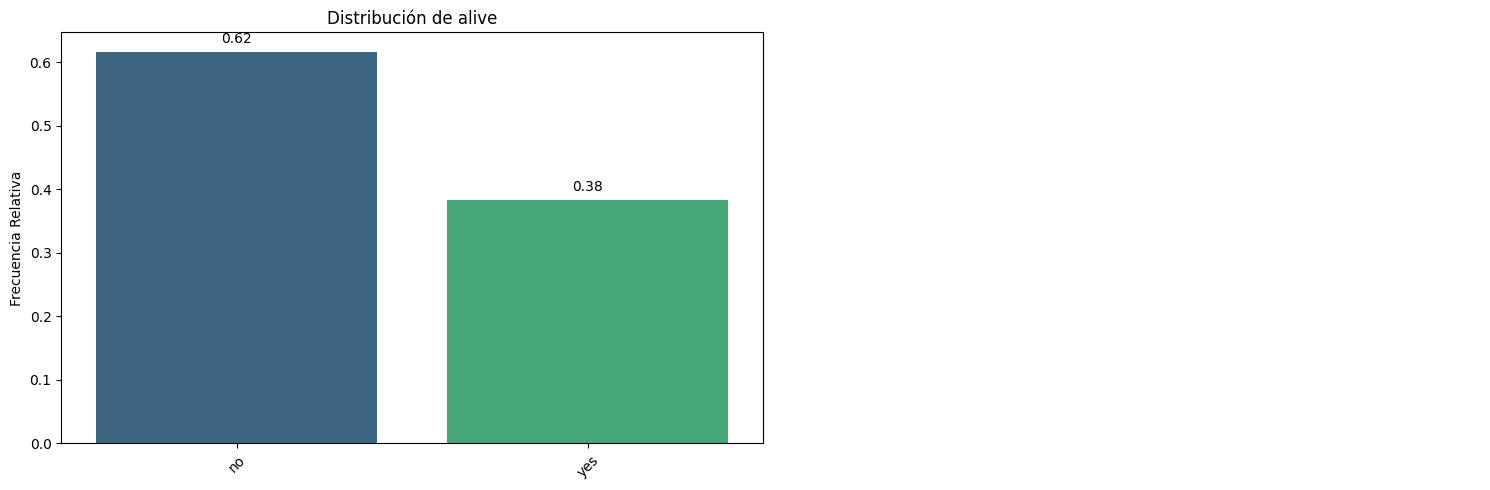

(2,)


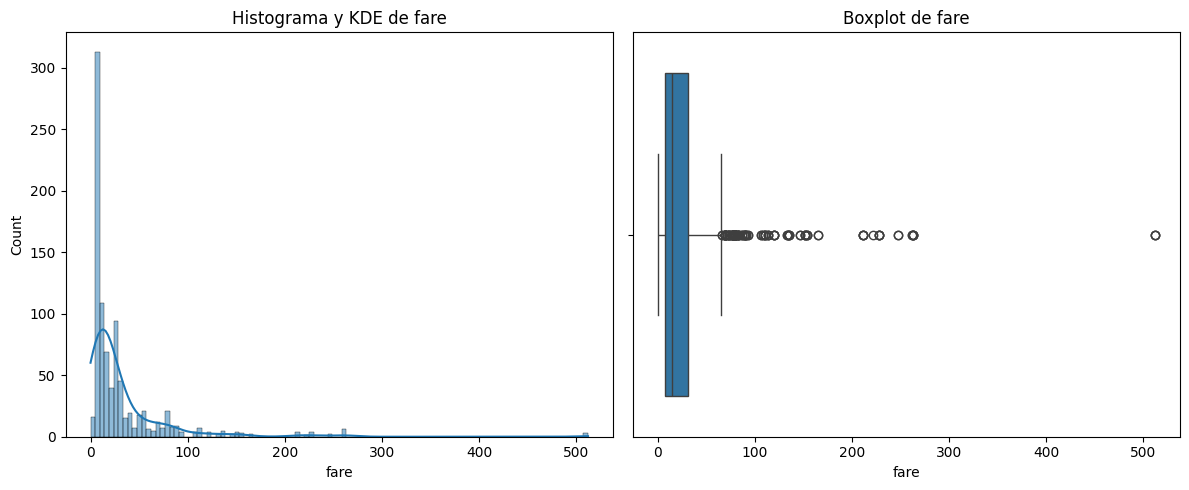

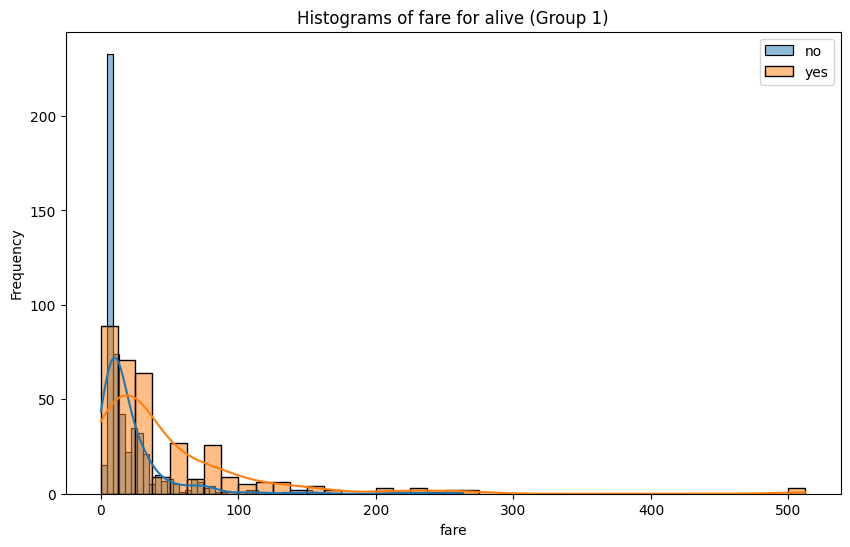

In [24]:
#4
pinta_distribucion_categoricas(df,["alive"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df,["fare"])
plot_grouped_histograms(df, "alive","fare", group_size= 2)


In [34]:
#4 parece haber una relacion directa entre supervivencia y precio del pasaje. 
#donde se cruzan ambas lineas (digamos que 35$) hay un cambio notable de la tendencia. Los que pagaron menos de 35$ tienen un indice mortalidad
#mayor que los que pagaron mas de 35$

#5 Si, existe un grupo de personas que pago 0 por el billete. Podriamos asumir que estos son los tripulantes del barco.
#como podemos ver abajo, todos son hombres entre 29-50 años embarcados en S sin familiares abordo donde todos menos uno sobrevivieron.
#hay un triple empate entre los pasajeros que mas pagaron (512.3292$) 2 mujeres y un hombre, los 3 sobrevivieron.
print(df[df["fare"]==0])

df[df["fare"]==df["fare"].max()]

      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
732  male  29.699118   0.0  

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


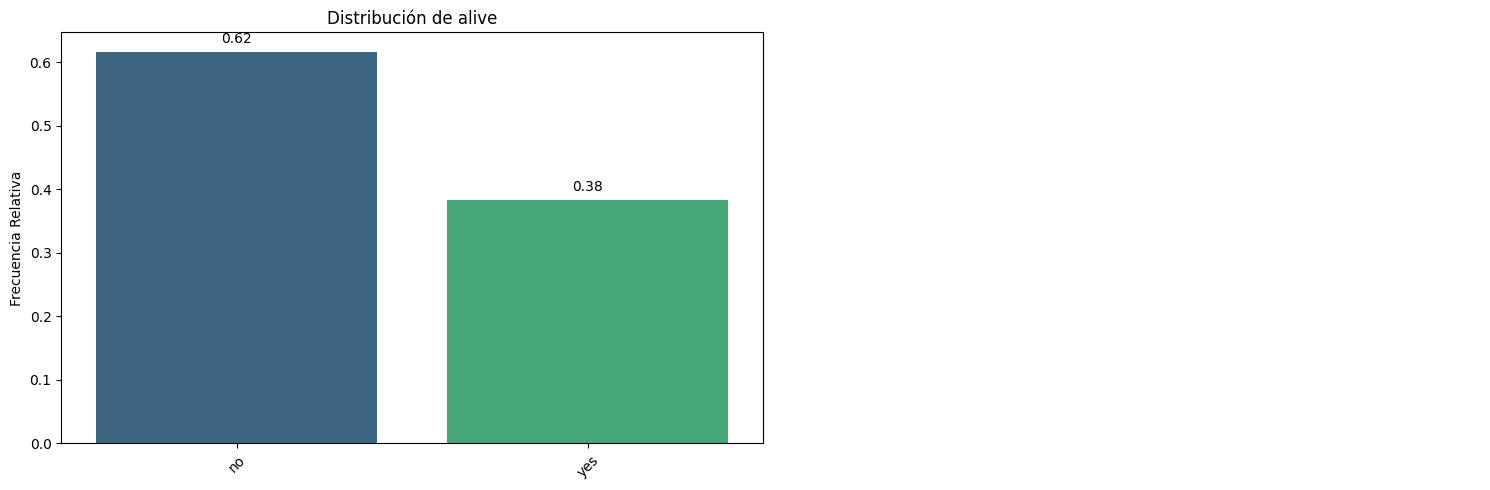

(2,)


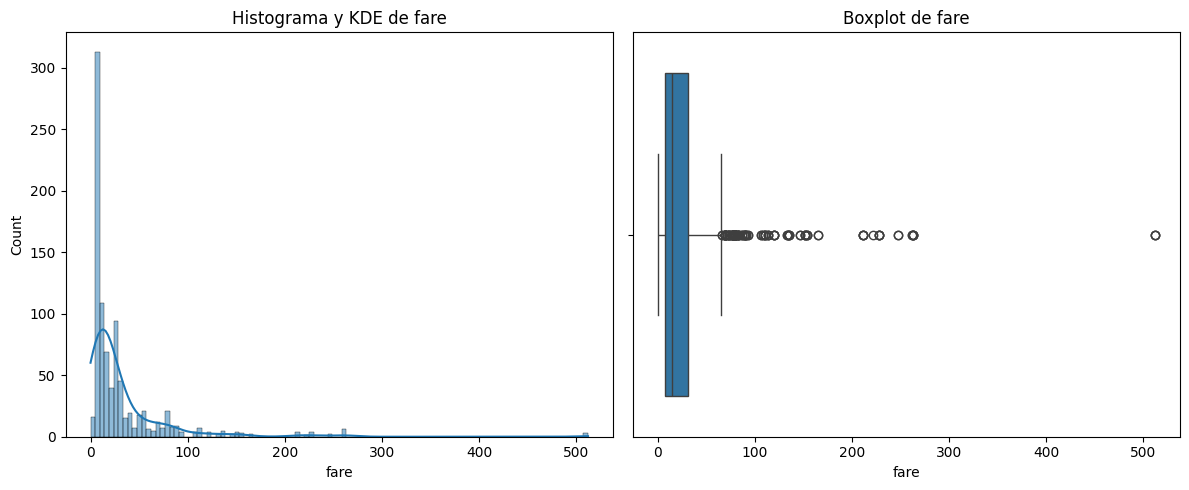

histograma de supervivientes


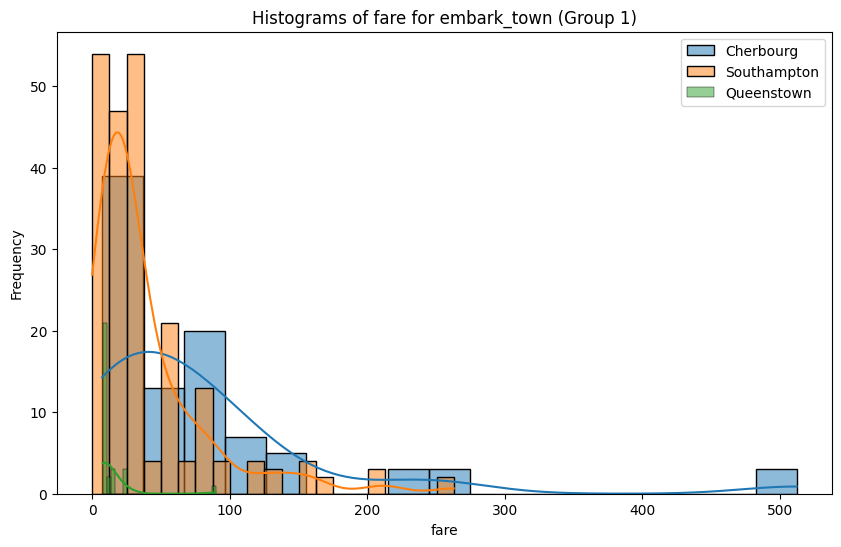

histograma de fallecidos


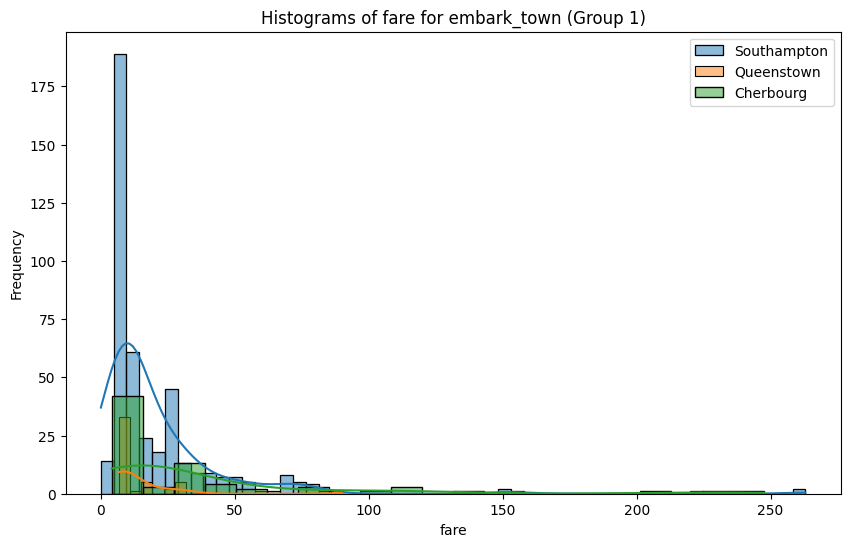

In [45]:
#6
df_sobrevivio = df[df["alive"]=="yes"]
df_fallecio = df[df["alive"]=="no"]

pinta_distribucion_categoricas(df,["alive"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df,["fare"])
print("histograma de supervivientes")
plot_grouped_histograms(df_sobrevivio, "embark_town","fare", group_size= 3)
print("histograma de fallecidos")
plot_grouped_histograms(df_fallecio, "embark_town","fare", group_size= 3)

#dividimos en 2 df uno para supervivientes y otro para fallecidos. Podemos ver que los supervivientes de S caen notablemente a partir de tener pasaje 
# superior a 35$ aproximadamente.
#la cantidad de pasajeros de Q es bastante baja por lo que es dificil sacar alguna conclusion. Sin embargo, como hemos dicho previamente haber embarcado 
#en C significa haber tenido mas porcentaje de supervivencia ya que la mayoria de los pasajeros de C pagaron mas dinero y por ende eran de primera clase.

Datos de supervivientes


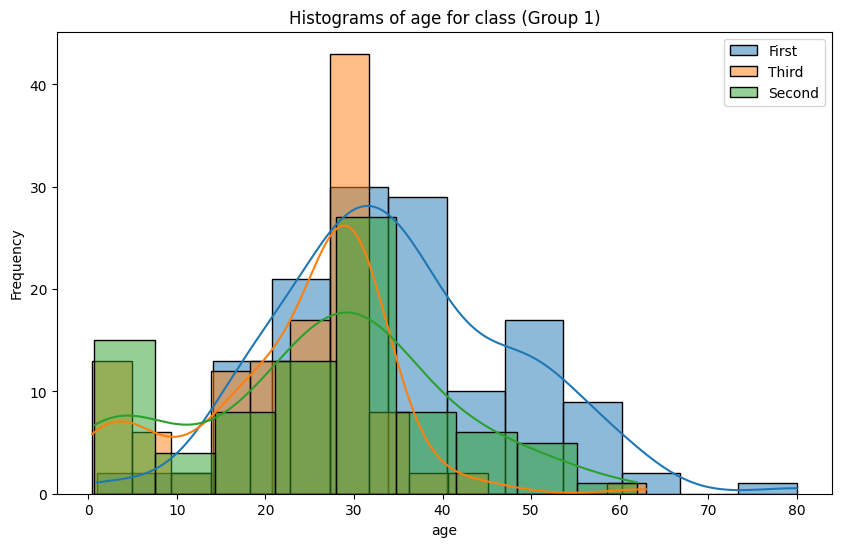

Datos de fallecidos


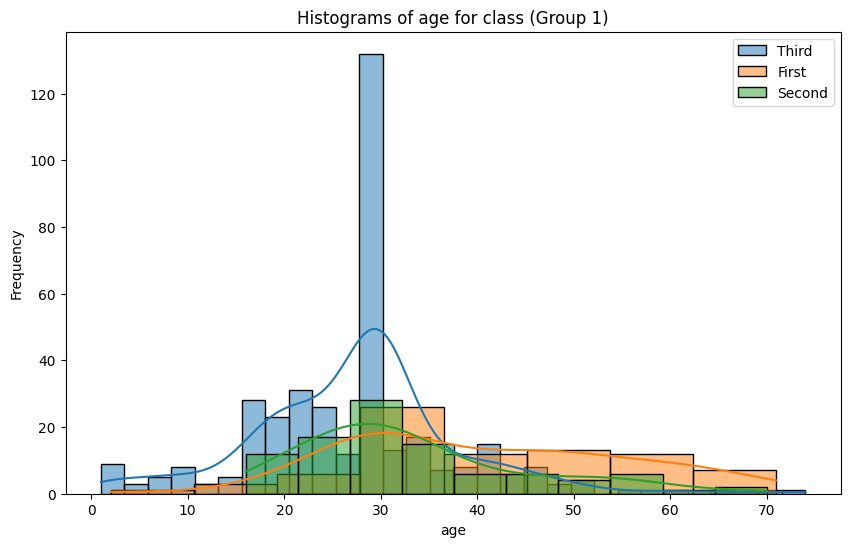

In [50]:
#7
print("Datos de supervivientes")
plot_grouped_histograms(df_sobrevivio, "class","age", group_size= 3)
print("Datos de fallecidos")
plot_grouped_histograms(df_fallecio, "class","age", group_size= 3)

In [ ]:
#7
#pare haber 3 grupos entre los supervivientes. El primer grupo engloba los pasajeros entre 0 y 14 años donde parece haber mas supervivientes
#entre los pasajeros de segunda y tercera clase (puede que esto sea por la abrumadora diferencia entre pasajeros de una clase y otra)
#El segundo grupo (el mas voluminoso) consta de los pasajeros entre 14 y 35 años de edad. Aqui hay una subida notable de supervivientes de los pasajeros
#de primera clase seguido de cerca de los pasajeros de tercera clase.
#Por ultimo, el grupo de 35+ años consta de una caida notable de los supervivientes de tercera clase. Si estabas en el barco y eras un pasajeros de tercera 
#clase con mas de 35 años de edad tenias unas probabilidades muy bajas de sobrevivir.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [55]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.drop(columns="mes", inplace = True)
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 42.9+ KB


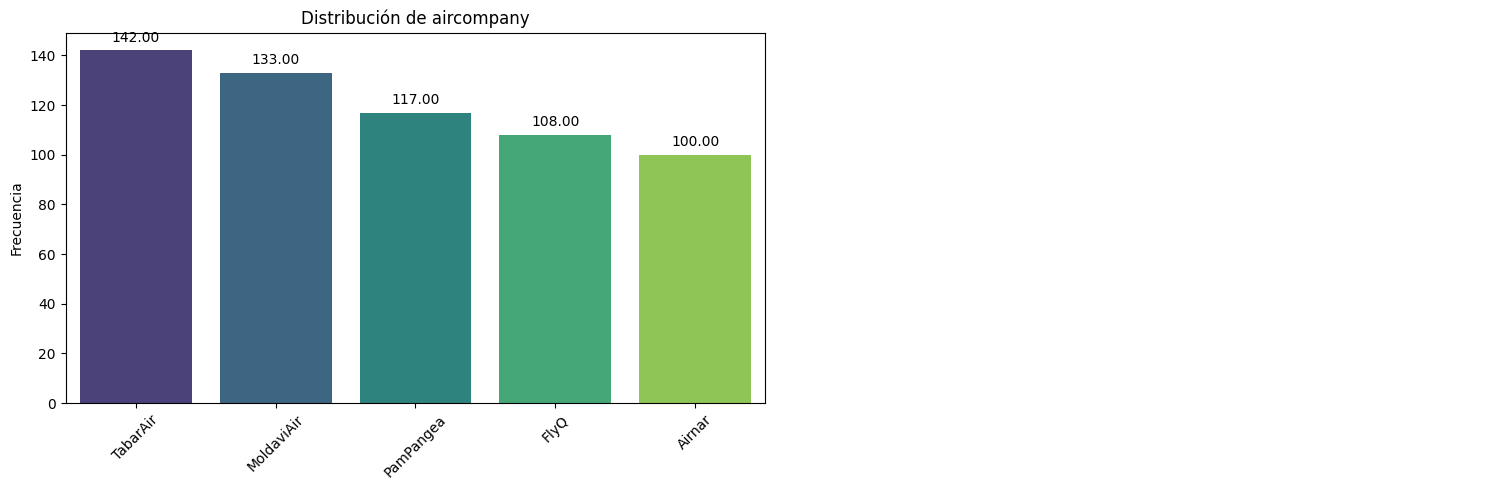

(2,)


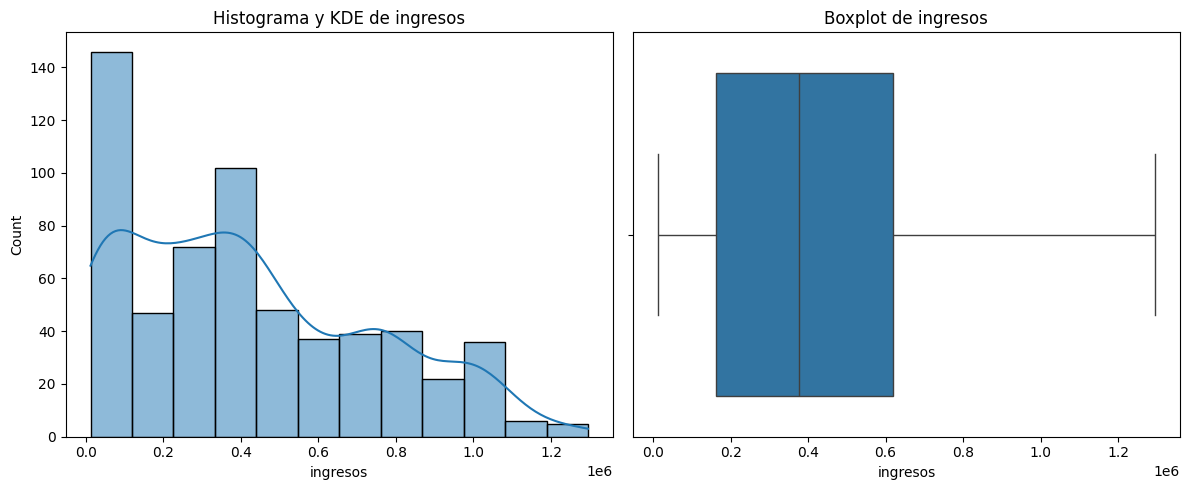

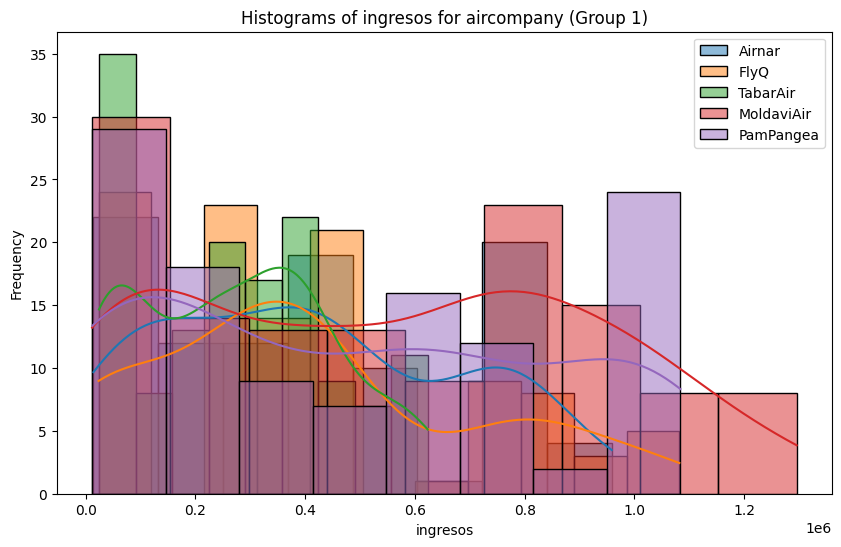

In [58]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], mostrar_valores= True)
plot_combined_graphs(df_viajes,["ingresos"])
plot_grouped_histograms(df_viajes, "aircompany","ingresos", group_size= 5)

In [ ]:
#TabarAir, a pesar de ser una de las que mas vuela, no es la que posee mas ingresos.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [ ]:
#no me dio tiempo de seguir :(

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.